In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')

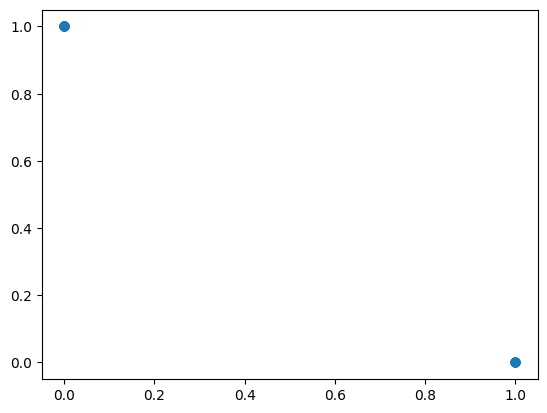

In [2]:
from bfn_discrete_data import BinaryData, BinaryDataLoader
import matplotlib.pyplot as plt
import torch

dataset = BinaryData(1000, 2)
dataloader = BinaryDataLoader(dataset, batch_size=100, shuffle=True)
batch = next(iter(dataloader))
plt.scatter(batch[:,0].numpy(), batch[:,1].numpy())

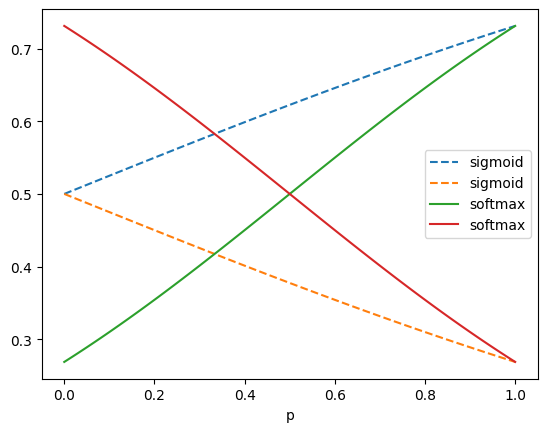

In [3]:
sigmoid, softmax = [],[]
for p in torch.linspace(0, 1, 100):
    a = [p, 1-p]
    softmax_a = torch.nn.functional.softmax(torch.tensor(a), dim=0)
    sigmoid_a = torch.sigmoid(torch.tensor(a))
    sigmoid_a[1] = 1-sigmoid_a[0]
    sigmoid.append(sigmoid_a)
    softmax.append(softmax_a)

plt.plot(torch.linspace(0, 1, 100), sigmoid, label='sigmoid', linestyle='--')
plt.plot(torch.linspace(0, 1, 100), softmax, label='softmax')
plt.xlabel('p')
plt.legend()

In [7]:
from bfn import BayesianFlowNetwork
from models import SimpleNeuralNetwork
from torch.optim import AdamW
from bfn_discrete_data import BinaryData, BinaryDataLoader
import matplotlib.pyplot as plt
dataset = BinaryData(1000, 2)
dataloader = BinaryDataLoader(dataset, batch_size=100, shuffle=True)
bfn_model = BayesianFlowNetwork(SimpleNeuralNetwork(), 2)
optim = AdamW(bfn_model.parameters(), lr=3e-4, betas=(0.9, 0.98), weight_decay=0.01)

epochs = 100
losses = []
for i in range(epochs):
    for _, batch in enumerate(dataloader):
        optim.zero_grad()
        loss = bfn_model.continuous_time_loss_for_discrete_data(batch)
        loss.backward()
        optim.step()
        losses.append(loss.item())
    print(f'Epoch {i+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/100, Loss: 1.9757397174835205
Epoch 2/100, Loss: 1.6962592601776123
Epoch 3/100, Loss: 1.7892934083938599
Epoch 4/100, Loss: 1.5285786390304565
Epoch 5/100, Loss: 1.710440993309021
Epoch 6/100, Loss: 1.5630886554718018
Epoch 7/100, Loss: 1.3389912843704224
Epoch 8/100, Loss: 1.354231595993042
Epoch 9/100, Loss: 1.1882604360580444
Epoch 10/100, Loss: 1.1826488971710205
Epoch 11/100, Loss: 0.9833647012710571
Epoch 12/100, Loss: 0.9938649535179138
Epoch 13/100, Loss: 0.9224061369895935
Epoch 14/100, Loss: 0.8452564477920532
Epoch 15/100, Loss: 0.8029512763023376
Epoch 16/100, Loss: 0.7363126277923584
Epoch 17/100, Loss: 0.6951345801353455
Epoch 18/100, Loss: 0.617149293422699
Epoch 19/100, Loss: 0.5627976655960083
Epoch 20/100, Loss: 0.5035313367843628
Epoch 21/100, Loss: 0.44353771209716797
Epoch 22/100, Loss: 0.42583972215652466
Epoch 23/100, Loss: 0.3787353038787842
Epoch 24/100, Loss: 0.3470326364040375
Epoch 25/100, Loss: 0.31007319688796997
Epoch 26/100, Loss: 0.288804799318

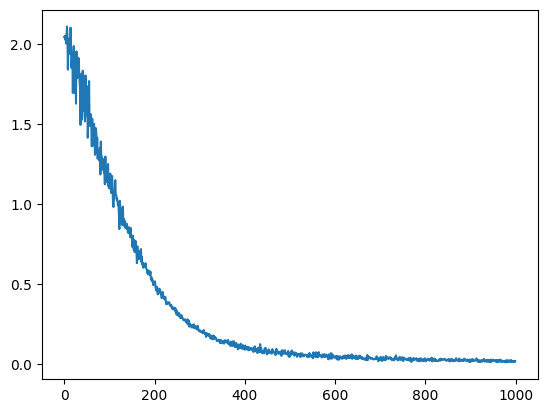

In [8]:
plt.plot(losses)

/Users/rupertmenneer/Documents/git/bayesian_flow/bfn/bfn.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor(self.beta_one * (((2*i)-1) / (n_steps**2)))


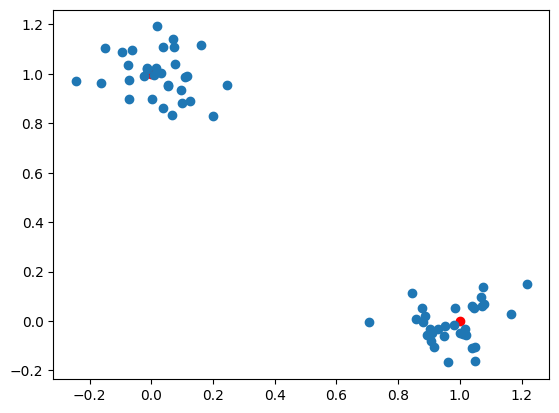

In [11]:
samples = bfn_model.sample_generation_for_discrete_data(n_steps=10).to(torch.float32)
samples = samples + torch.randn_like(samples)*0.1
plt.scatter(0, 1, c='r')
plt.scatter(1, 0, c='r')
plt.scatter(samples[:, 0], samples[:, 1])

In [ ]:
 ls ../bfn_github/

In [ ]:

from bfn_github.bfn import BayesianFlowNetwork
import torch
# network should learn:
# when x0 = 0, x1 = 1
# when x0 = 1, x1 = 0
def get_datapoint(batch=128, device='cpu'):
    x0 = torch.randint(0, 2, size=(batch,), dtype=torch.bool, device=device)
    x1 = ~x0

    X = torch.stack([x0, x1], dim=0)
    return X.long().transpose(0, 1)

X = get_datapoint()  # (B, D=2) with K=2 classes 
print(X.shape)
# plt.title("Dataset")
# plt.scatter(X[:, 0], X[:, 1]);
# plt.grid()

from torch.optim import AdamW
from tqdm.auto import tqdm

bfn = BayesianFlowNetwork()

optim = AdamW(bfn.parameters(), lr=1e-2)


n = 1000
losses = []
for i in tqdm(range(n)):
    optim.zero_grad()
    X = get_datapoint(device='cpu')
    loss = bfn.process(X)
    loss.backward()
    optim.step()
    losses.append(loss.item())

bfn.sample(16)

In [ ]:
torch.nn.functional.one_hot(torch.tensor([2, 1]).unsqueeze(0), num_classes=3)